In [1]:
from msibi import MSIBI, State, Pair, Bond, Angle, mie
import gsd
import gsd.hoomd

## Step 1:
use cmeutils.polymers for:

1. Create CG mapping representation of the atomistic trajectory
2. Get bond length and angle distributions for each atomistic trajectory
    - The most probably bond length and angle will be used as the equilibrium distances
3. Write a .gsd file of the CG representation of the atomistic trajectory
    - This new .gsd file will be used by MSIBI to find the target pair RDFs

In [2]:
%%bash
if [ -d "states" ]
then
    rm -r states
fi

In [3]:
cg_traj_files = ["CG_20_10mers_0.75kT.gsd", "CG_20_10mers_2.0kT.gsd", "CG_20_10mers_5.0kT.gsd"]

In [4]:
opt = MSIBI(
    rdf_cutoff=5.0,
    n_rdf_points=101,
    max_frames=5,
    pot_cutoff=5.0,
    smooth_rdfs=True,
    verbose=True
)

## Add States

In [5]:
opt.add_state(
    State(name="A", kT=0.75, traj_file=cg_traj_files[0], alpha=0.30)
)
opt.add_state(
    State(name="B", kT=2.0, traj_file=cg_traj_files[1], alpha=0.50)
)
opt.add_state(
    State(name="C", kT=5.0, traj_file=cg_traj_files[2], alpha=0.20)
)

## Add Pairs

In [6]:
initial_guess = mie(opt.pot_r, 1.0, 1.0)
opt.add_pair(Pair(type1="P", type2="P", potential=initial_guess))
opt.add_pair(Pair(type1="M", type2="M", potential=initial_guess))
opt.add_pair(Pair(type1="P", type2="M", potential=initial_guess))

/Users/jenny/Projects/msibi/msibi/potentials.py:11: RuntimeWarning: divide by zero encountered in true_divide
  return prefactor * eps * ((sig / r) ** m - (sig / r) ** n)
/Users/jenny/Projects/msibi/msibi/potentials.py:11: RuntimeWarning: invalid value encountered in subtract
  return prefactor * eps * ((sig / r) ** m - (sig / r) ** n)


## Add Bonds

In [7]:
opt.add_bond(Bond(type1="P", type2="M", k=100, r0=3.9))

## Add Angles

In [8]:
opt.add_angle(Angle(type1="P", type2="M", type3="P", k=100, theta=1.1))
opt.add_angle(Angle(type1="M", type2="P", type3="M", k=100, theta=1.1))

## Run Optimization Iterations

Using HOOMD version 2.
-------- Iteration 0 --------
Launching 4 CPU threads...


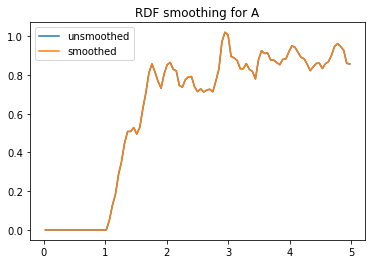

pair P-P, state A, iteration 0: 0.999856


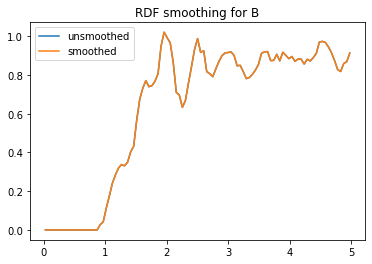

pair P-P, state B, iteration 0: 0.999838


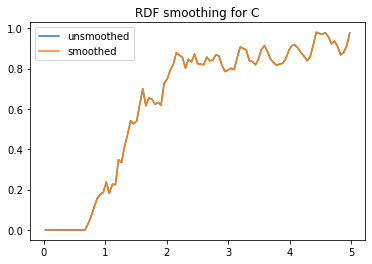

pair P-P, state C, iteration 0: 0.999645


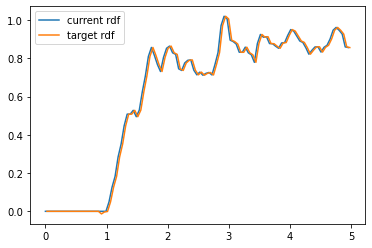

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


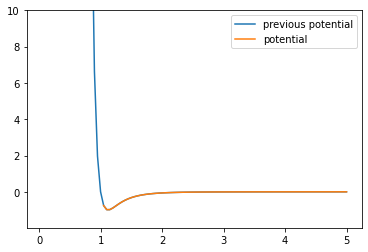

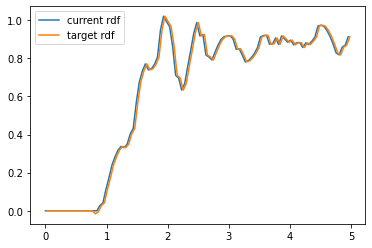

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


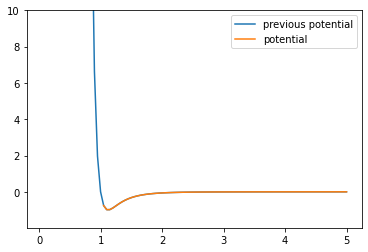

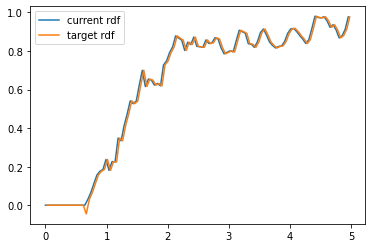

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


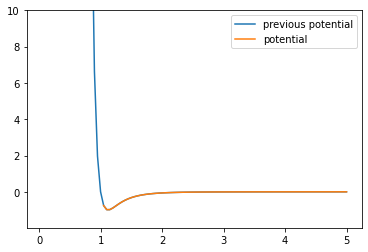

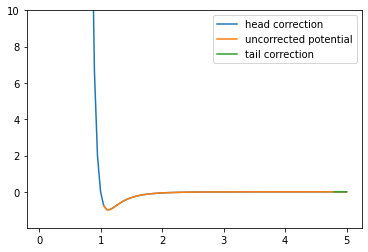

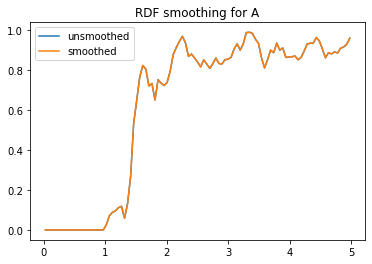

pair M-M, state A, iteration 0: 0.999699


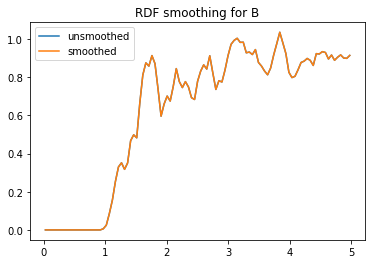

pair M-M, state B, iteration 0: 0.999782


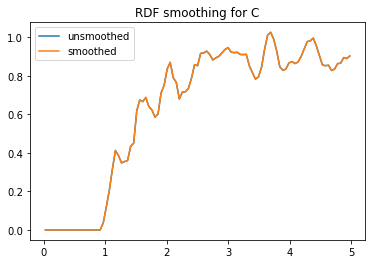

pair M-M, state C, iteration 0: 0.999705


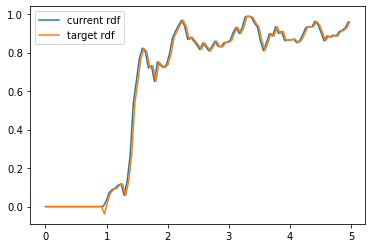

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


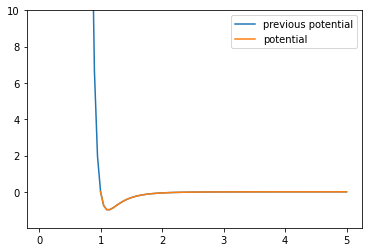

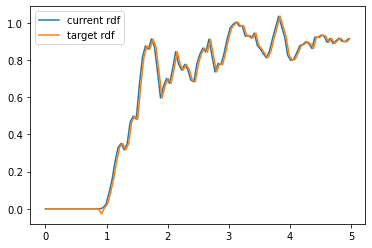

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


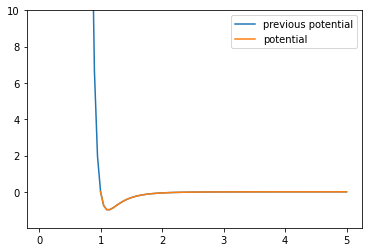

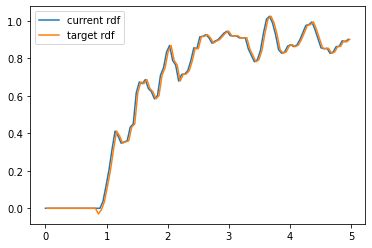

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


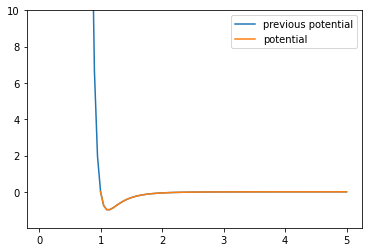

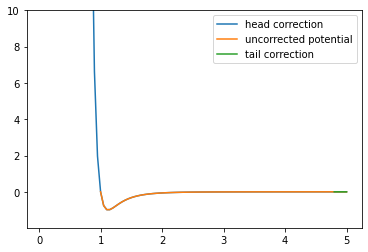

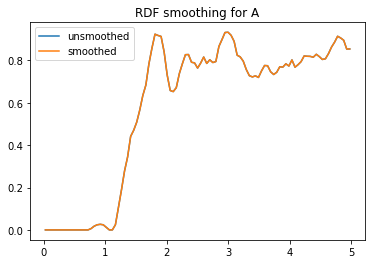

pair P-M, state A, iteration 0: 0.999691


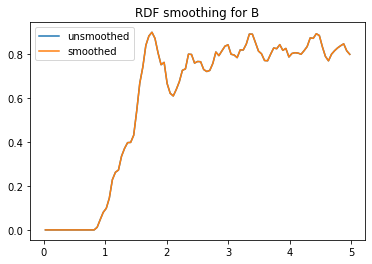

pair P-M, state B, iteration 0: 0.999847


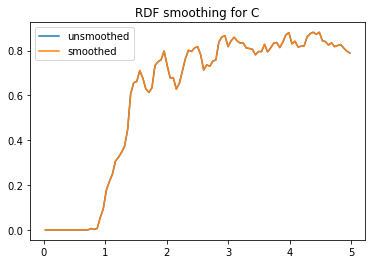

pair P-M, state C, iteration 0: 0.999921


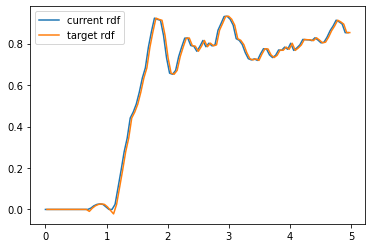

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


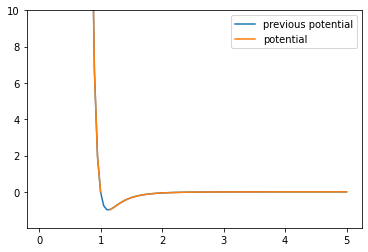

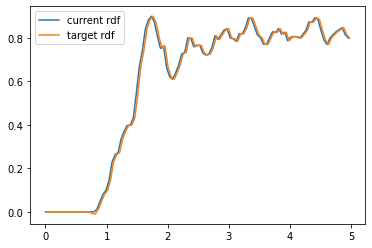

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


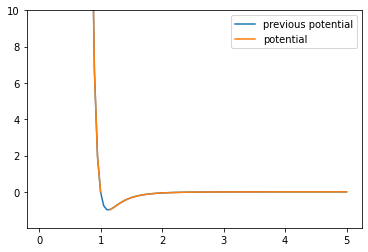

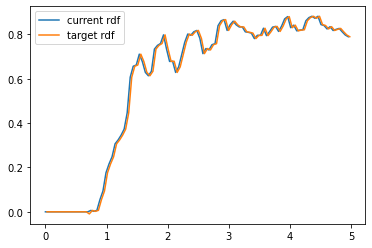

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


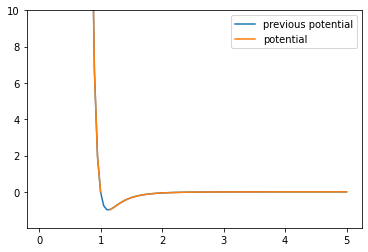

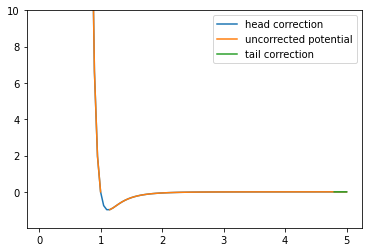

-------- Iteration 1 --------
Launching 4 CPU threads...


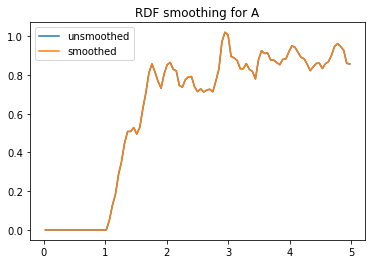

pair P-P, state A, iteration 1: 0.999856


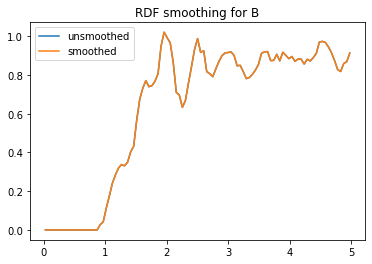

pair P-P, state B, iteration 1: 0.999838


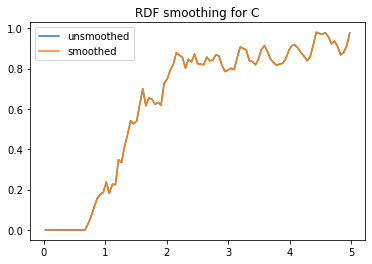

pair P-P, state C, iteration 1: 0.999645


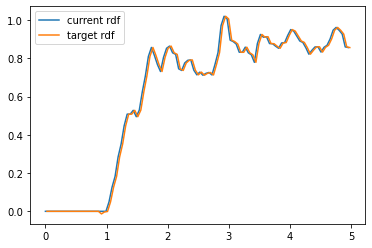

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


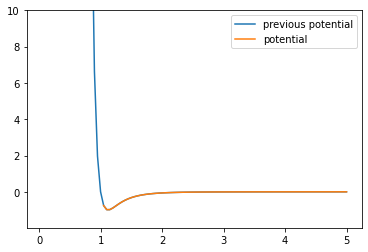

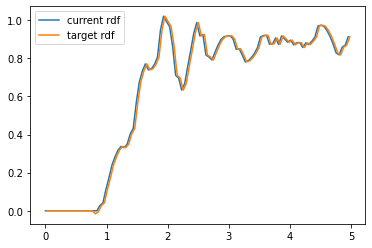

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


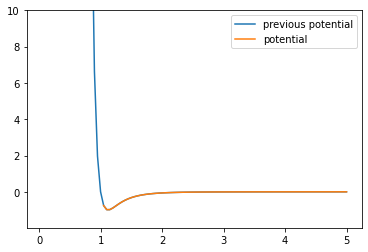

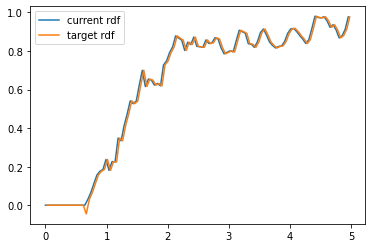

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


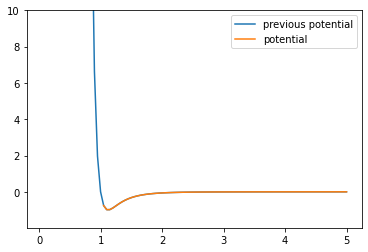

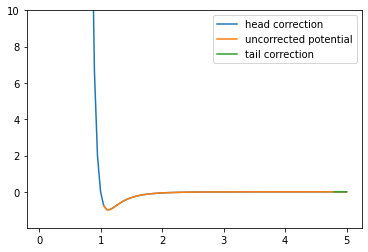

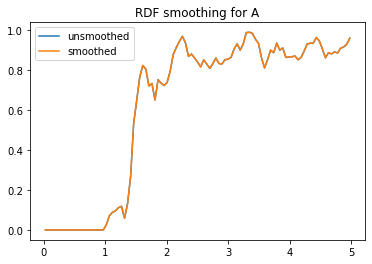

pair M-M, state A, iteration 1: 0.999699


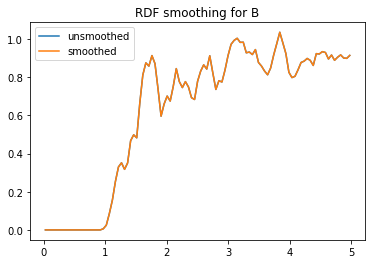

pair M-M, state B, iteration 1: 0.999782


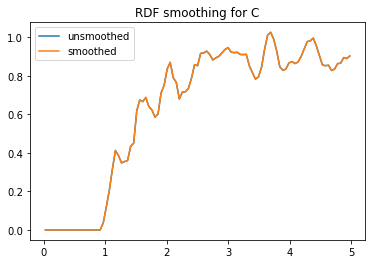

pair M-M, state C, iteration 1: 0.999705


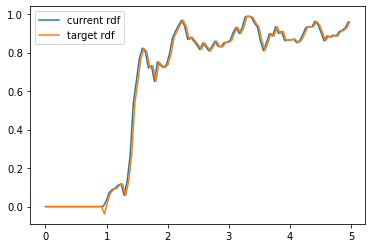

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


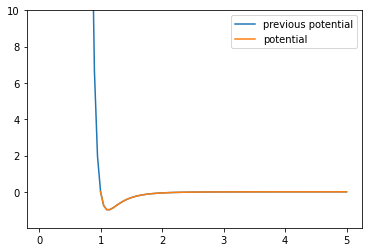

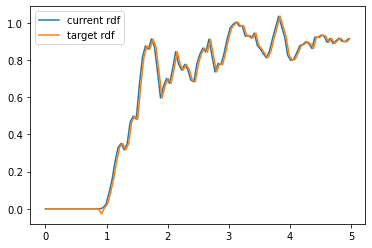

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


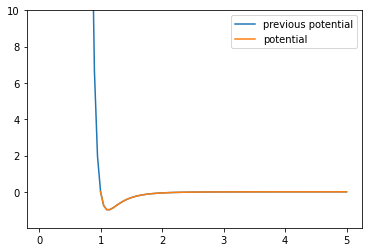

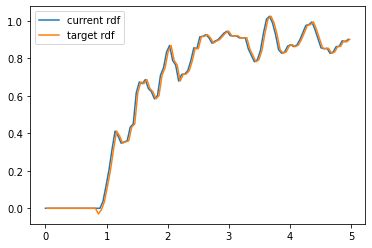

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


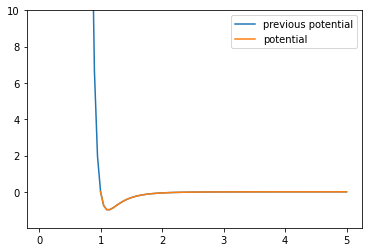

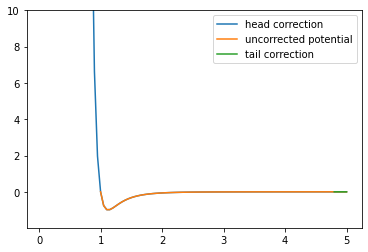

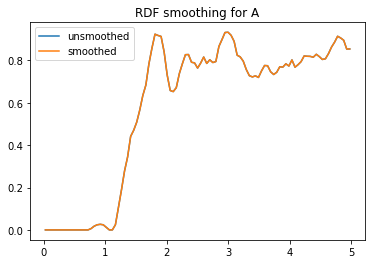

pair P-M, state A, iteration 1: 0.999691


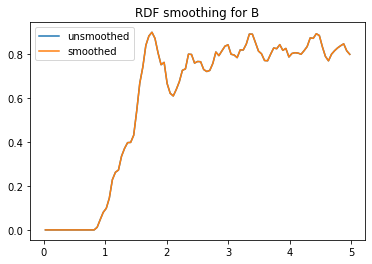

pair P-M, state B, iteration 1: 0.999847


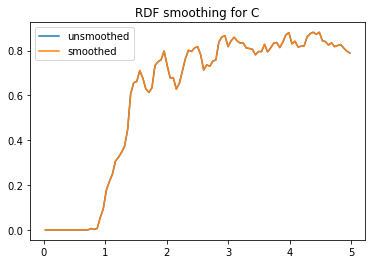

pair P-M, state C, iteration 1: 0.999921


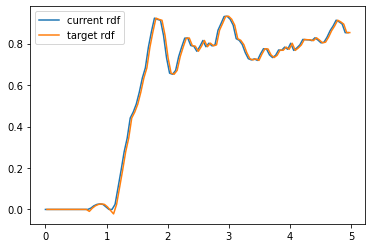

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


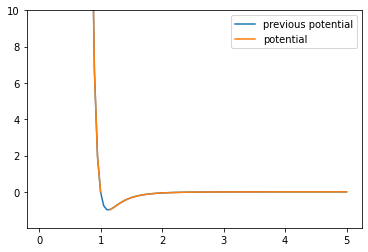

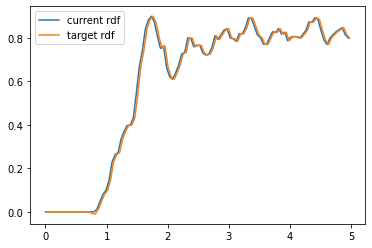

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


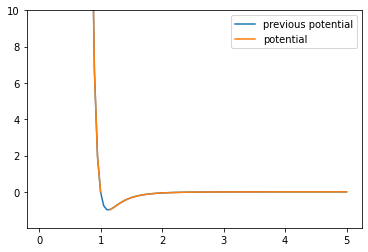

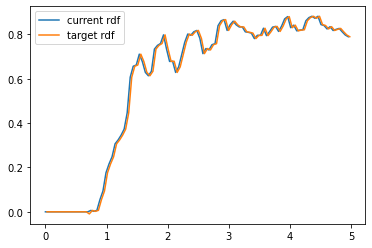

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


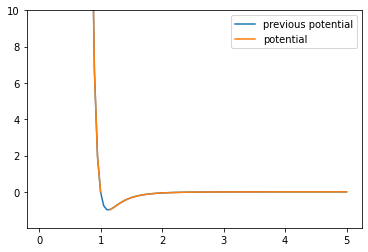

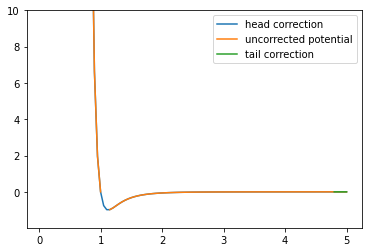

-------- Iteration 2 --------
Launching 4 CPU threads...


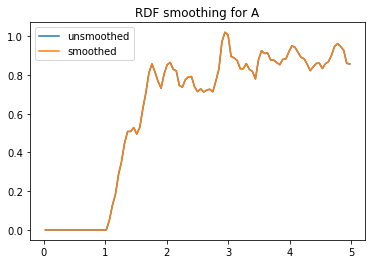

pair P-P, state A, iteration 2: 0.999856


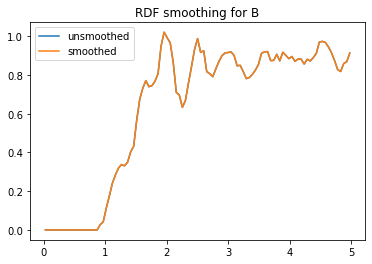

pair P-P, state B, iteration 2: 0.999838


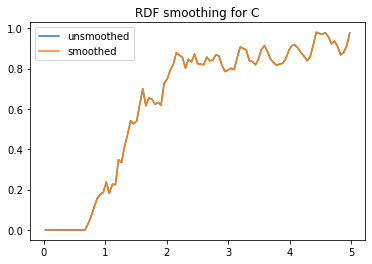

pair P-P, state C, iteration 2: 0.999645


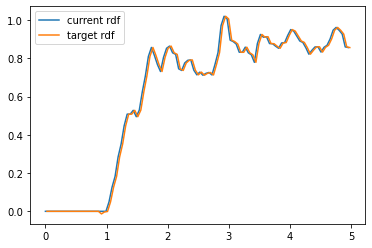

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


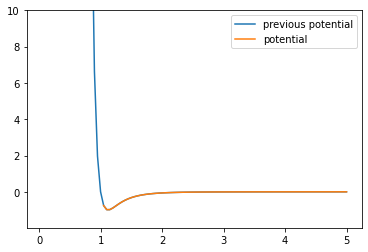

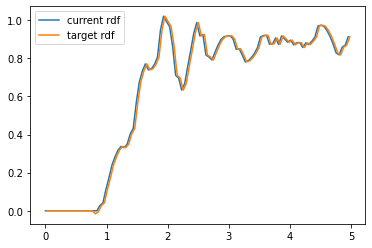

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


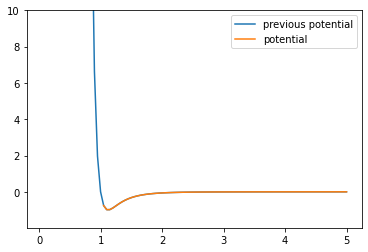

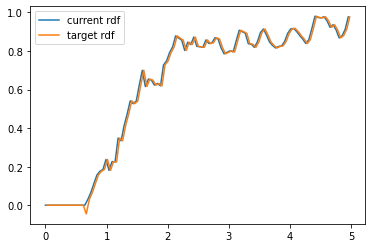

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


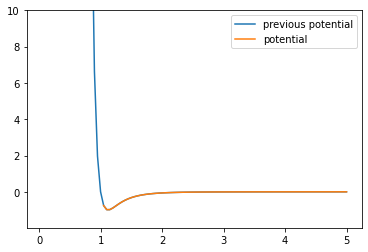

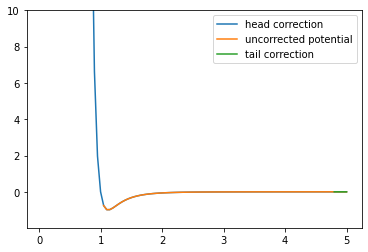

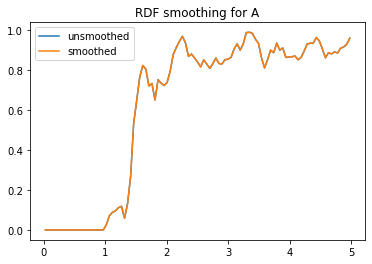

pair M-M, state A, iteration 2: 0.999699


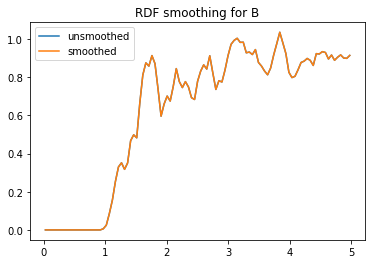

pair M-M, state B, iteration 2: 0.999782


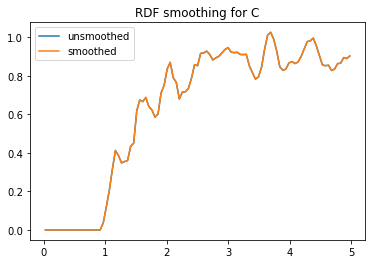

pair M-M, state C, iteration 2: 0.999705


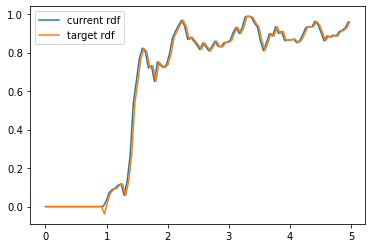

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


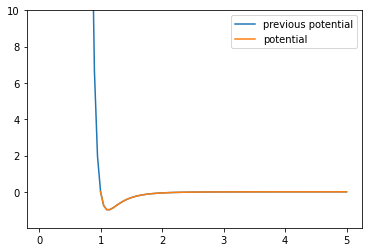

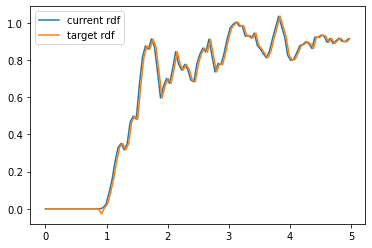

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


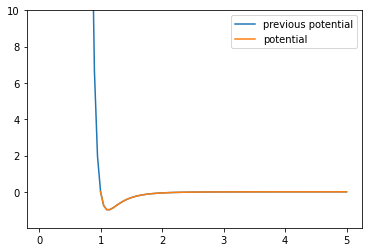

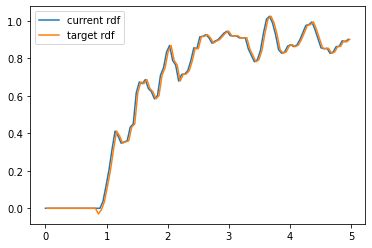

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


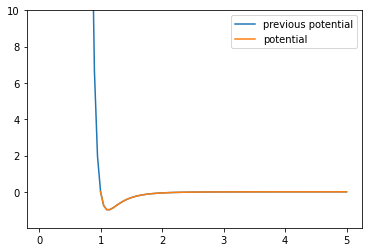

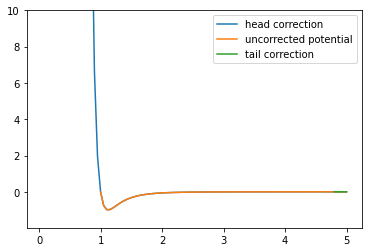

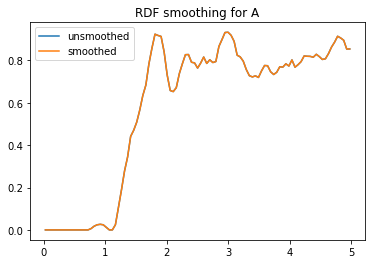

pair P-M, state A, iteration 2: 0.999691


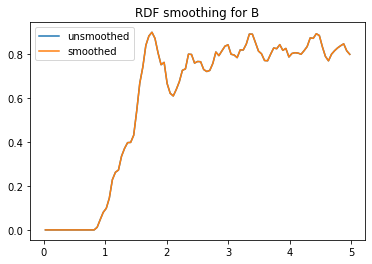

pair P-M, state B, iteration 2: 0.999847


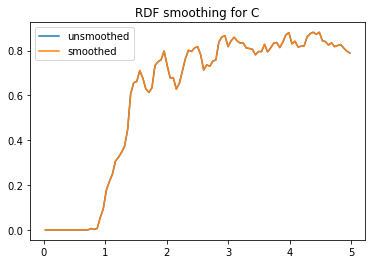

pair P-M, state C, iteration 2: 0.999921


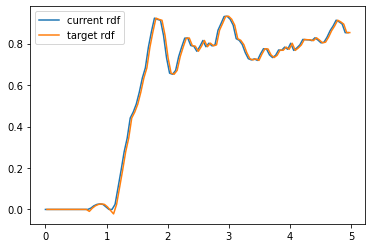

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


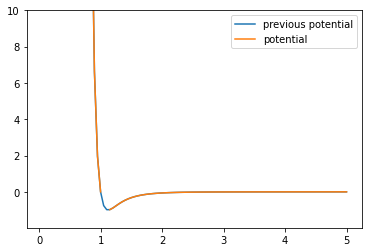

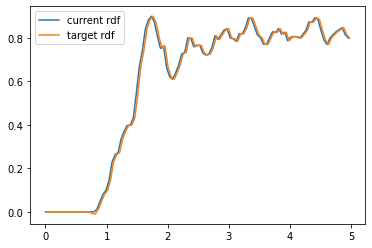

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


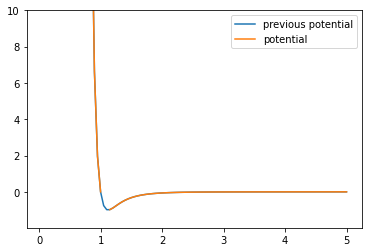

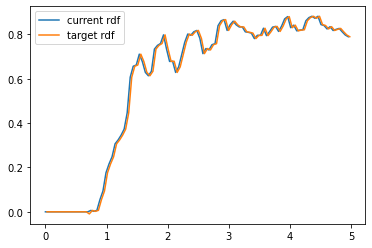

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


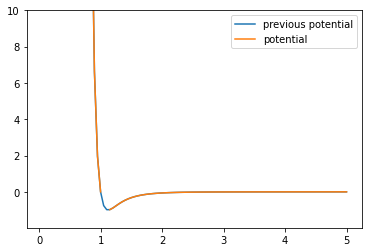

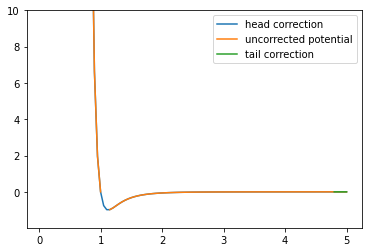

-------- Iteration 3 --------
Launching 4 CPU threads...


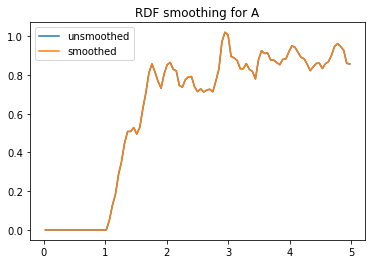

pair P-P, state A, iteration 3: 0.999856


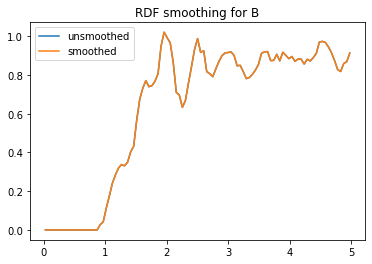

pair P-P, state B, iteration 3: 0.999838


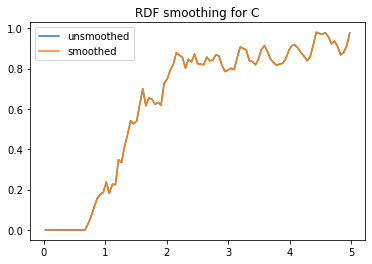

pair P-P, state C, iteration 3: 0.999645


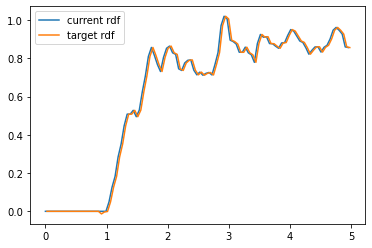

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


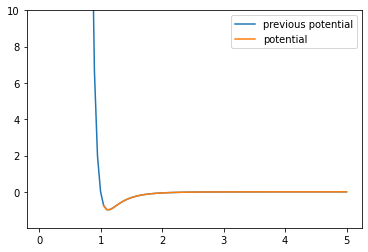

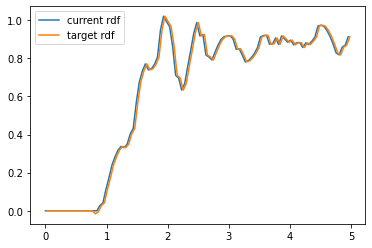

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


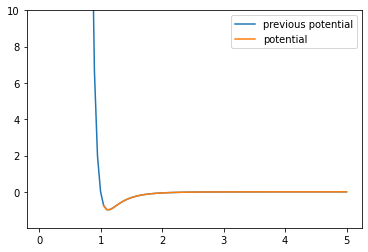

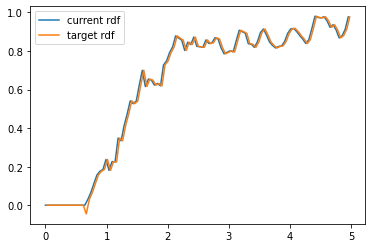

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


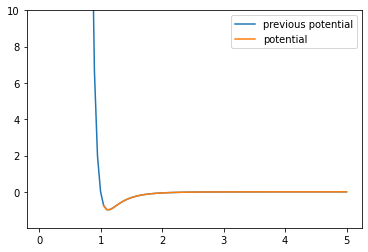

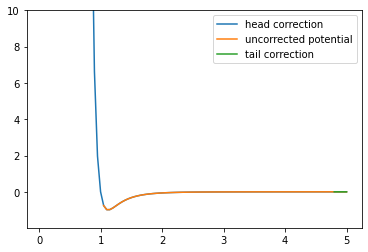

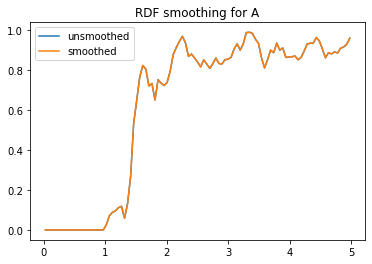

pair M-M, state A, iteration 3: 0.999699


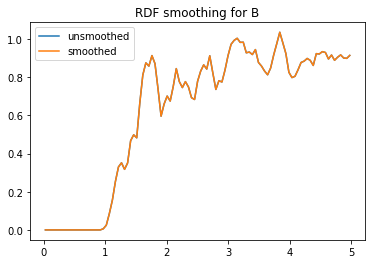

pair M-M, state B, iteration 3: 0.999782


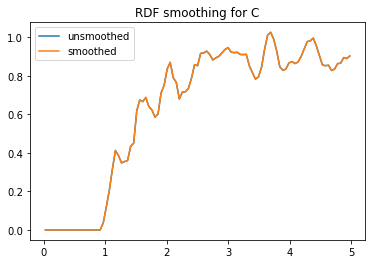

pair M-M, state C, iteration 3: 0.999705


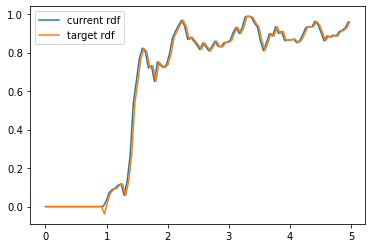

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


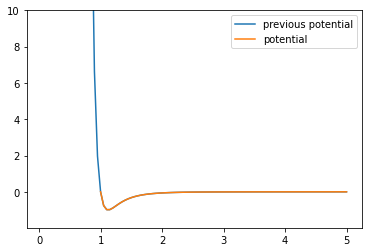

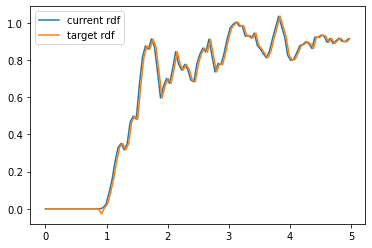

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


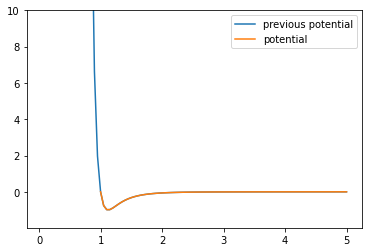

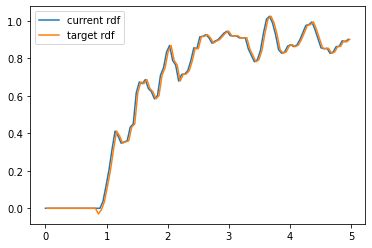

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


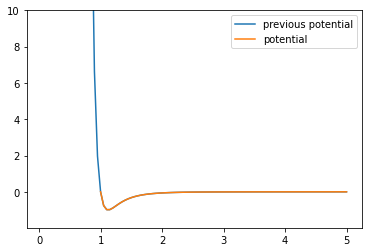

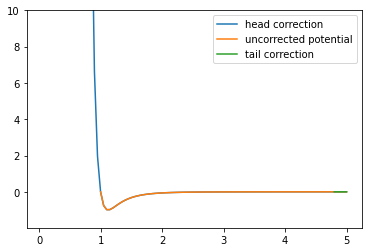

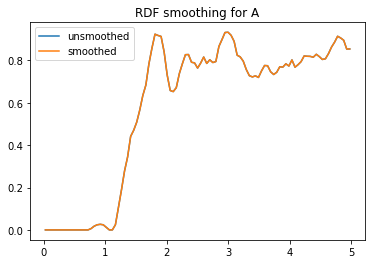

pair P-M, state A, iteration 3: 0.999691


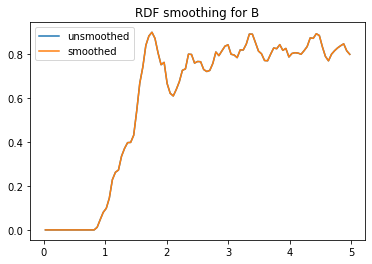

pair P-M, state B, iteration 3: 0.999847


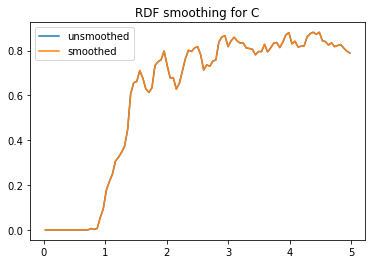

pair P-M, state C, iteration 3: 0.999921


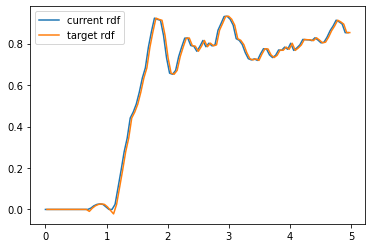

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


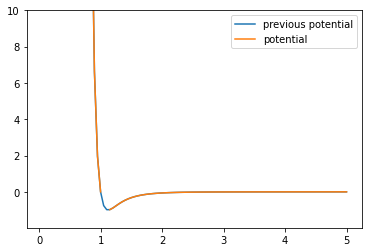

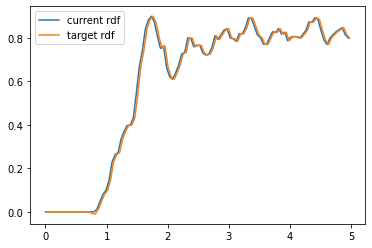

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


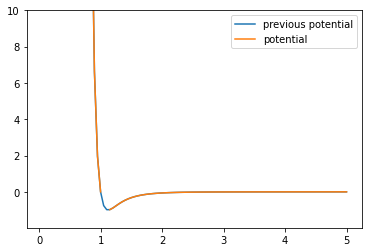

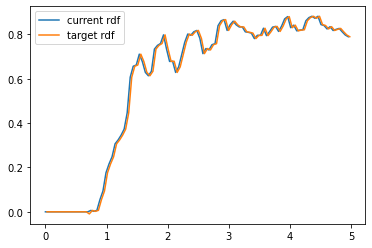

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


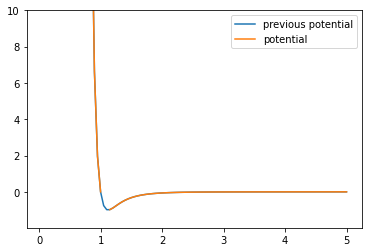

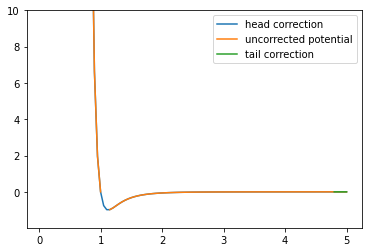

-------- Iteration 4 --------
Launching 4 CPU threads...


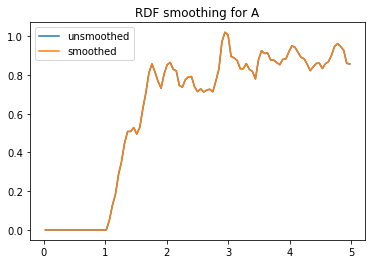

pair P-P, state A, iteration 4: 0.999856


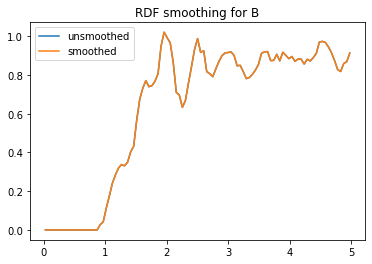

pair P-P, state B, iteration 4: 0.999838


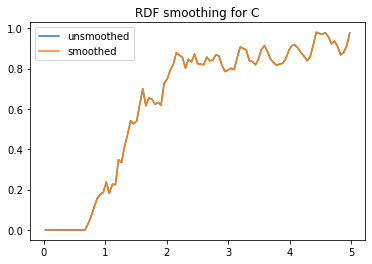

pair P-P, state C, iteration 4: 0.999645


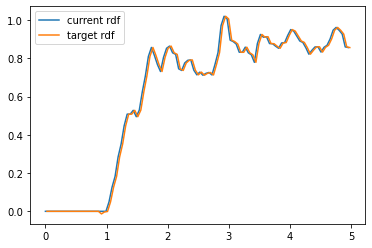

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


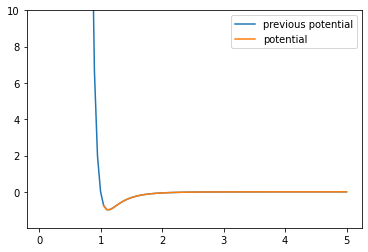

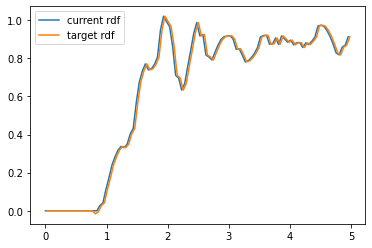

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


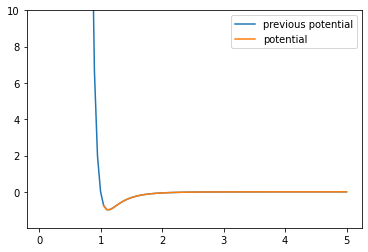

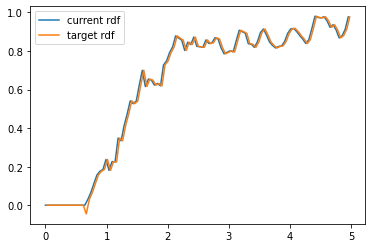

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


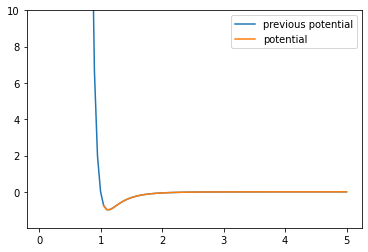

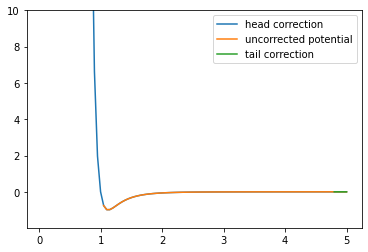

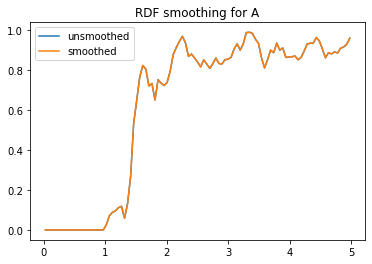

pair M-M, state A, iteration 4: 0.999699


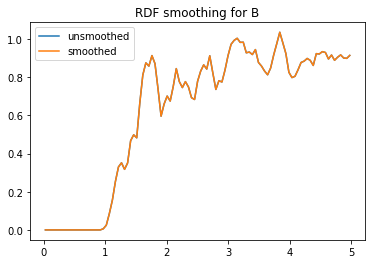

pair M-M, state B, iteration 4: 0.999782


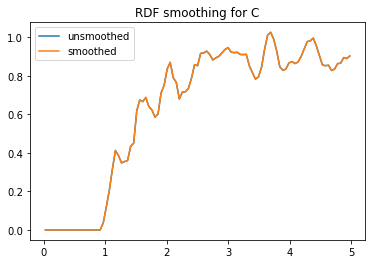

pair M-M, state C, iteration 4: 0.999705


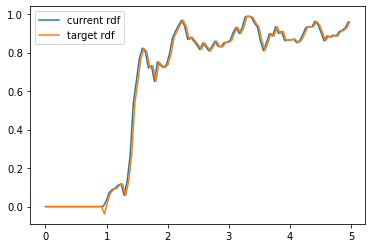

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


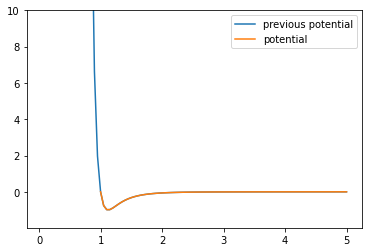

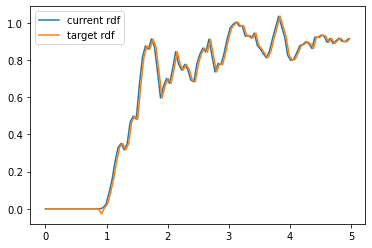

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


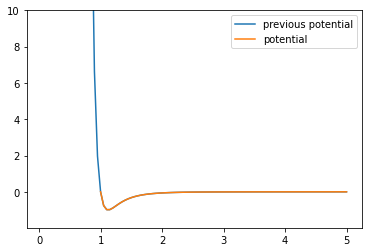

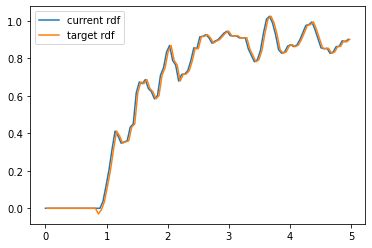

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


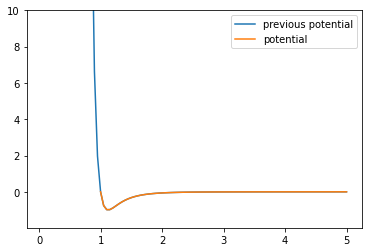

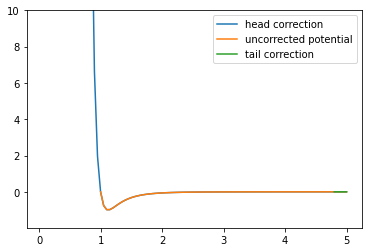

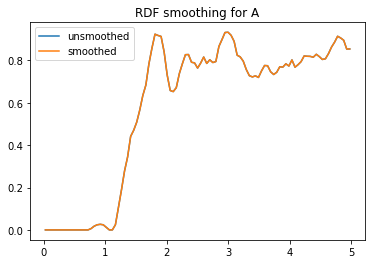

pair P-M, state A, iteration 4: 0.999691


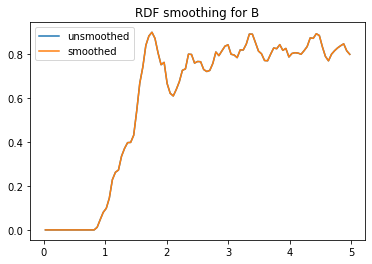

pair P-M, state B, iteration 4: 0.999847


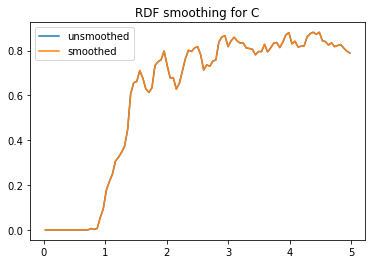

pair P-M, state C, iteration 4: 0.999921


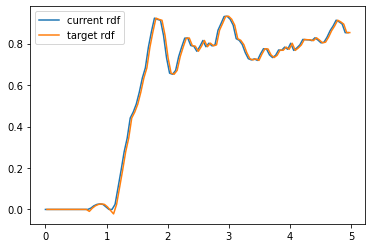

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


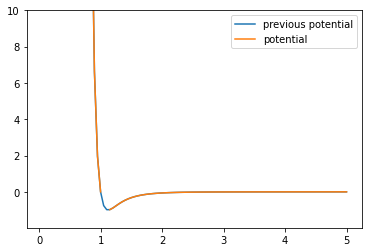

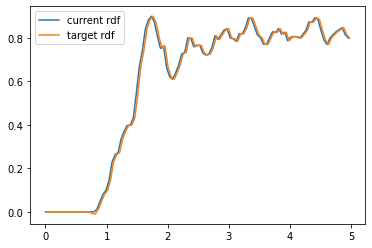

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


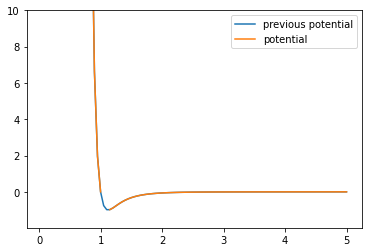

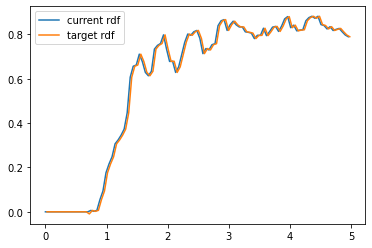

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


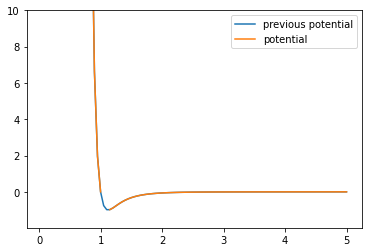

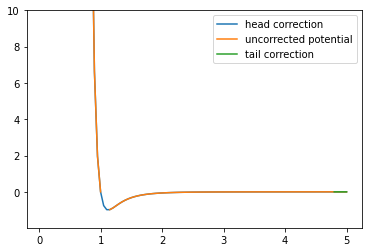

-------- Iteration 5 --------
Launching 4 CPU threads...


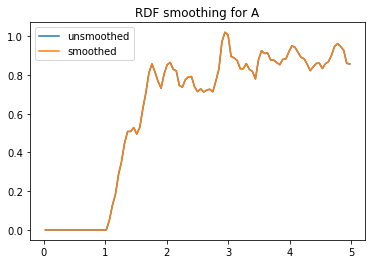

pair P-P, state A, iteration 5: 0.999856


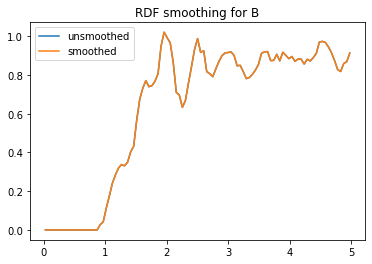

pair P-P, state B, iteration 5: 0.999838


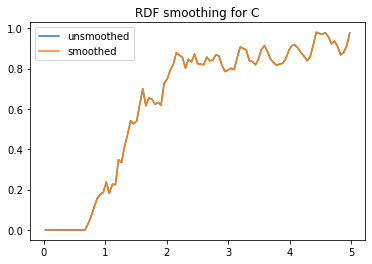

pair P-P, state C, iteration 5: 0.999645


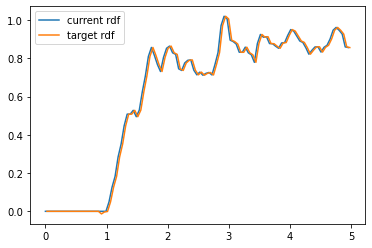

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


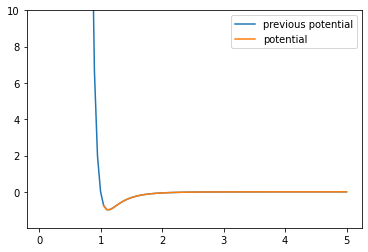

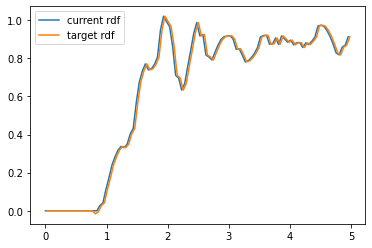

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


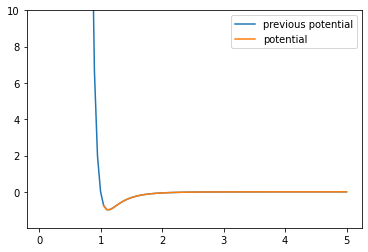

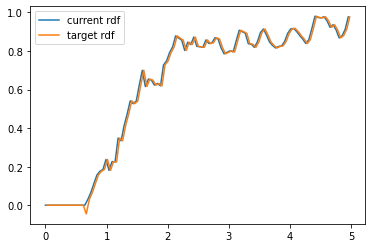

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


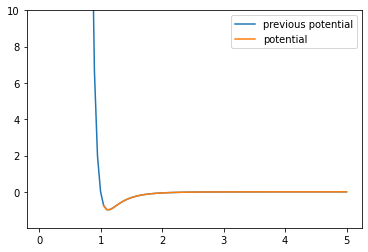

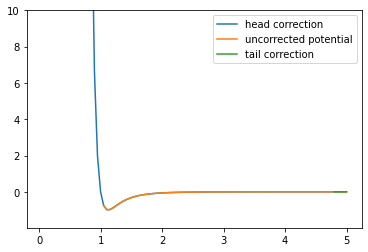

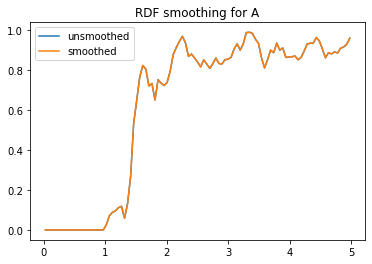

pair M-M, state A, iteration 5: 0.999699


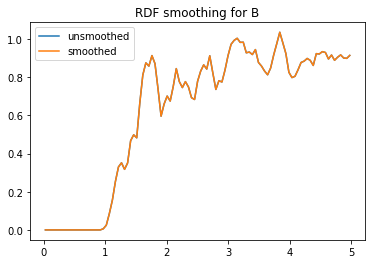

pair M-M, state B, iteration 5: 0.999782


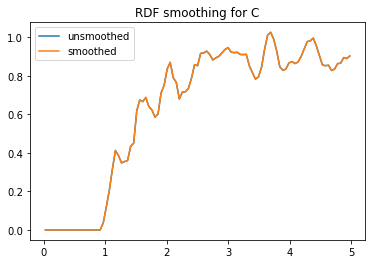

pair M-M, state C, iteration 5: 0.999705


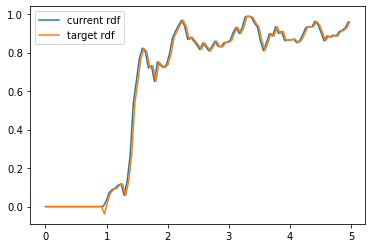

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


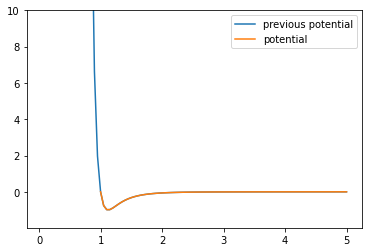

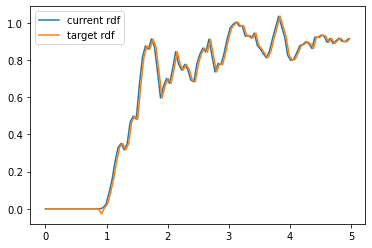

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


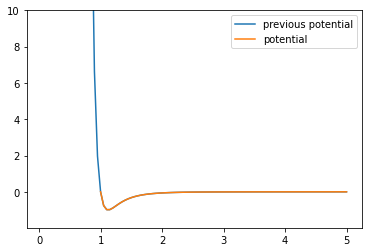

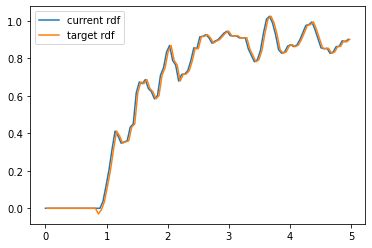

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


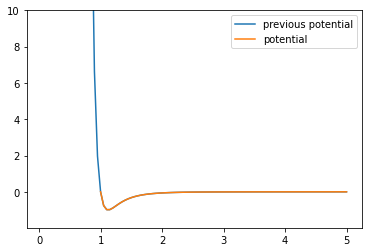

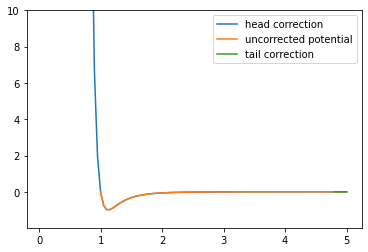

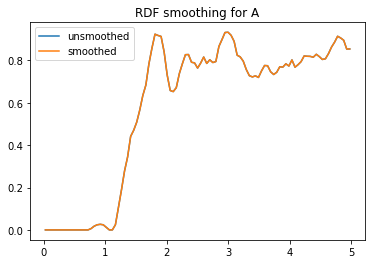

pair P-M, state A, iteration 5: 0.999691


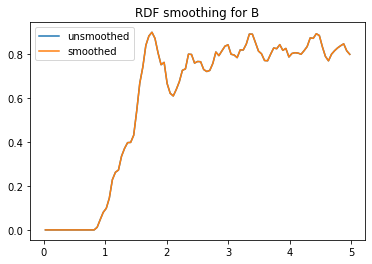

pair P-M, state B, iteration 5: 0.999847


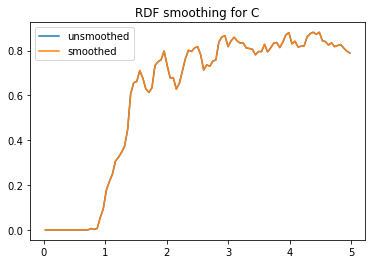

pair P-M, state C, iteration 5: 0.999921


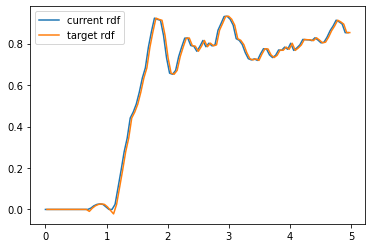

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


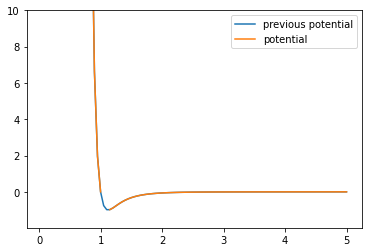

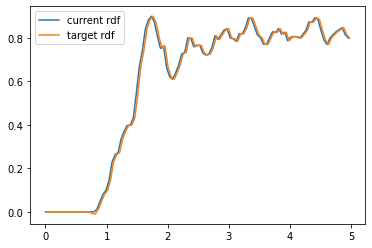

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


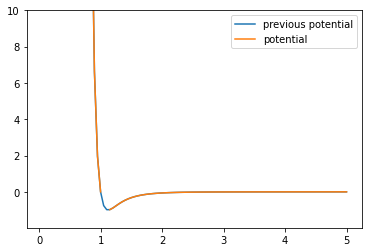

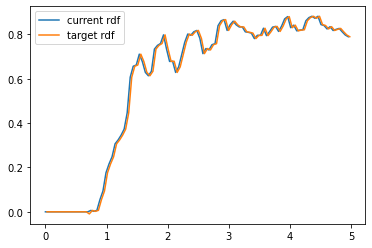

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


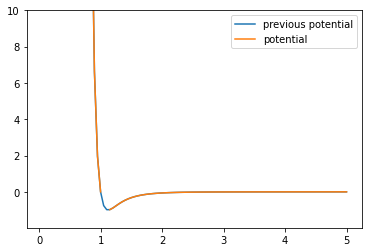

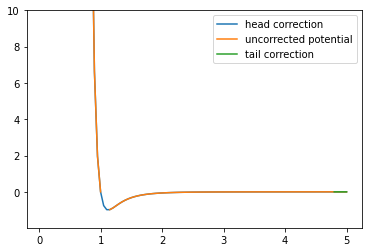

-------- Iteration 6 --------
Launching 4 CPU threads...


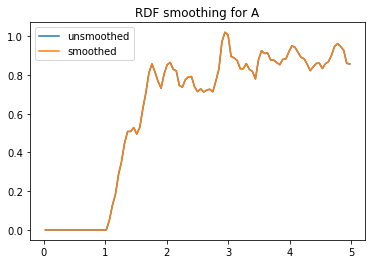

pair P-P, state A, iteration 6: 0.999856


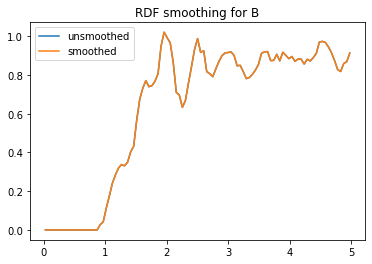

pair P-P, state B, iteration 6: 0.999838


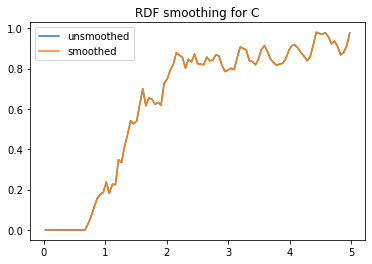

pair P-P, state C, iteration 6: 0.999645


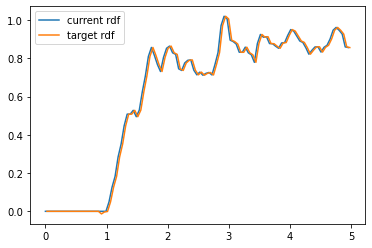

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


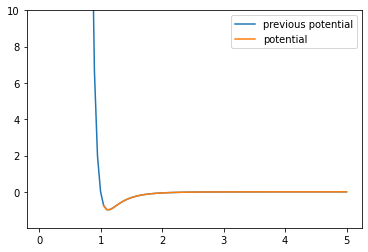

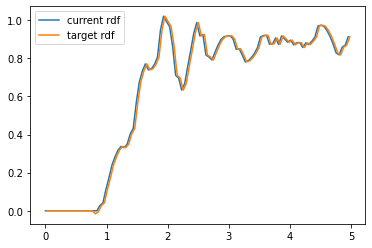

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


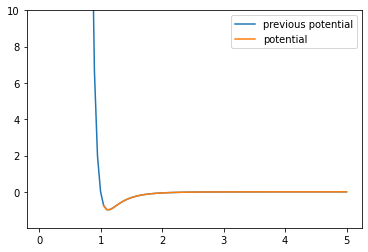

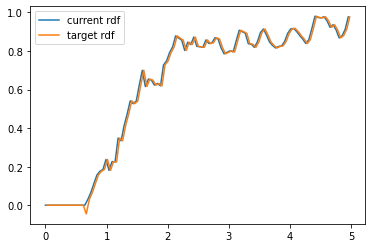

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


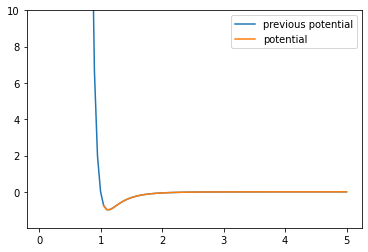

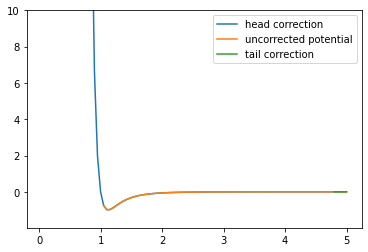

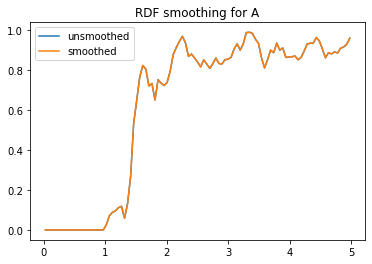

pair M-M, state A, iteration 6: 0.999699


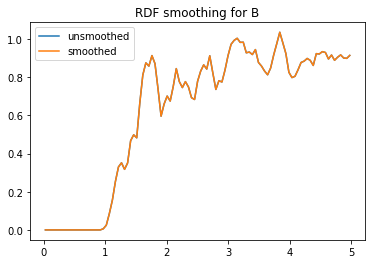

pair M-M, state B, iteration 6: 0.999782


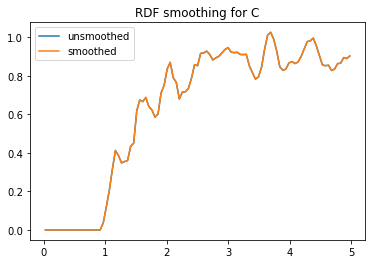

pair M-M, state C, iteration 6: 0.999705


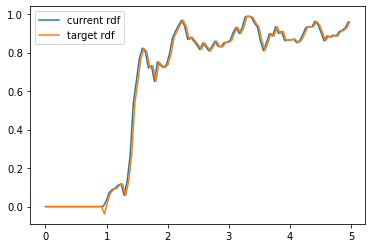

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


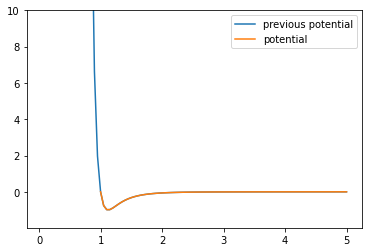

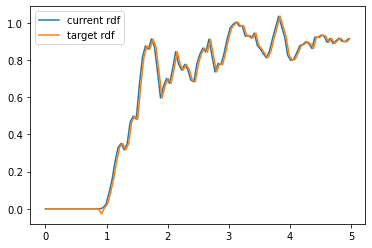

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


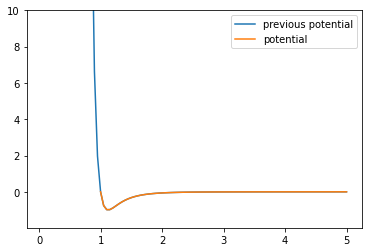

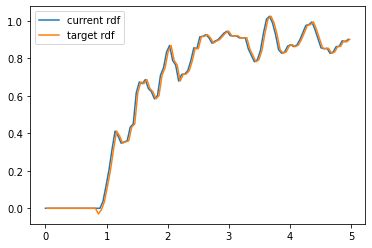

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


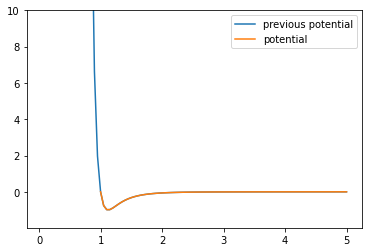

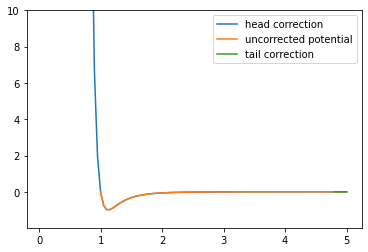

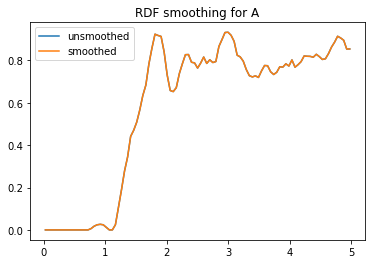

pair P-M, state A, iteration 6: 0.999691


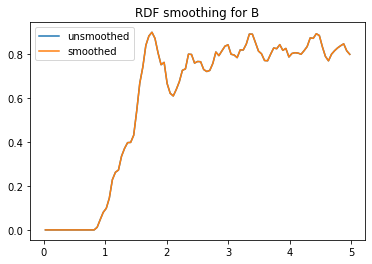

pair P-M, state B, iteration 6: 0.999847


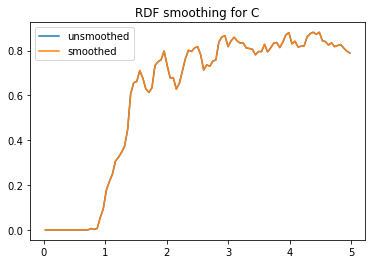

pair P-M, state C, iteration 6: 0.999921


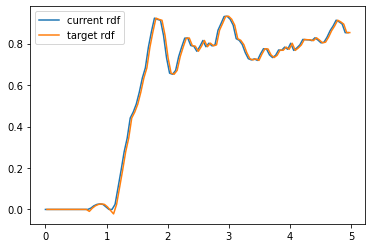

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


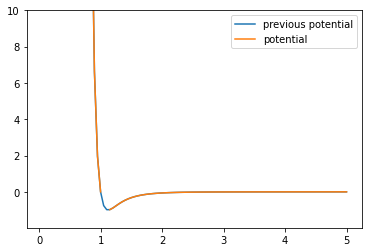

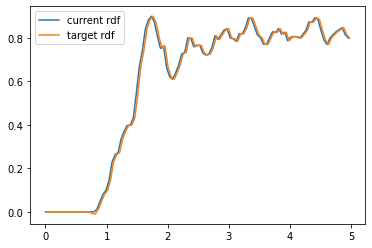

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


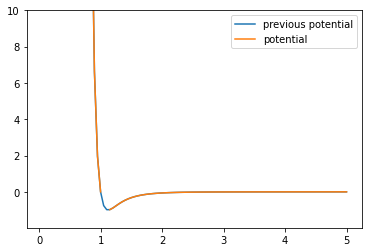

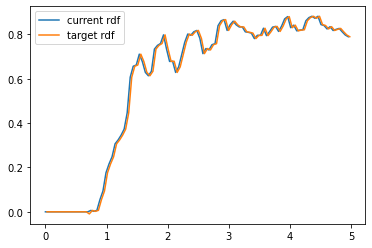

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


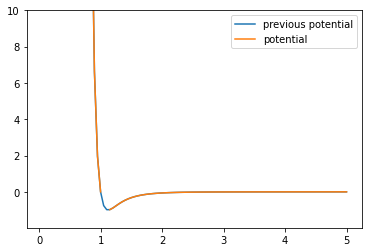

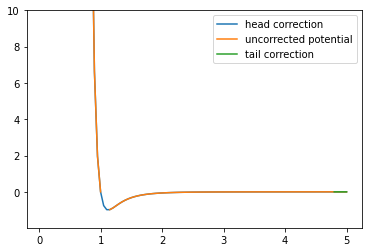

-------- Iteration 7 --------
Launching 4 CPU threads...


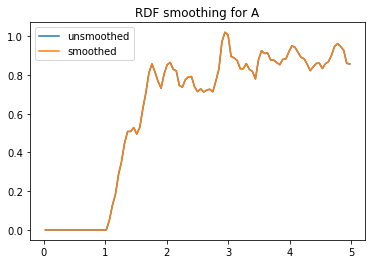

pair P-P, state A, iteration 7: 0.999856


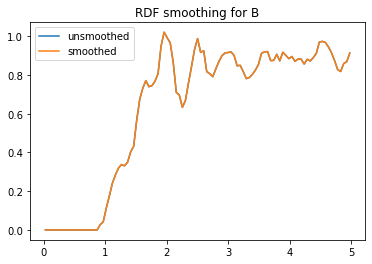

pair P-P, state B, iteration 7: 0.999838


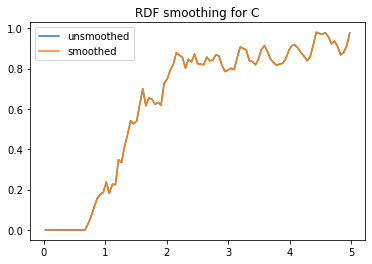

pair P-P, state C, iteration 7: 0.999645


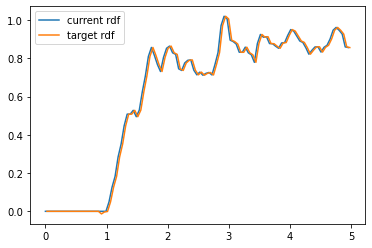

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


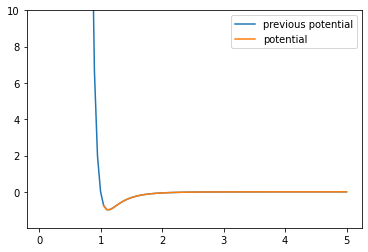

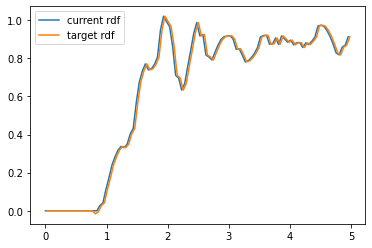

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


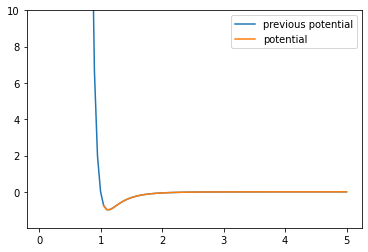

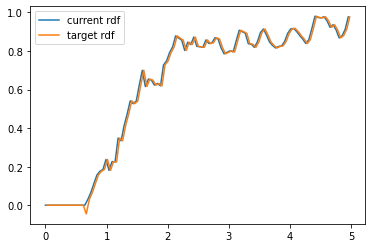

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


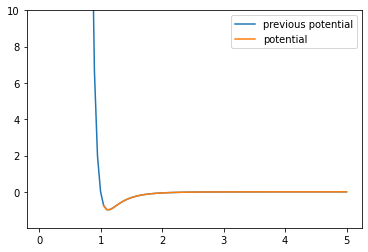

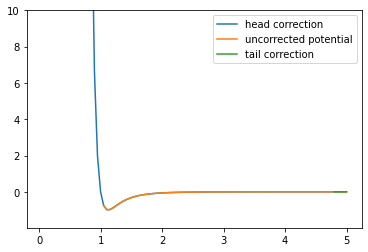

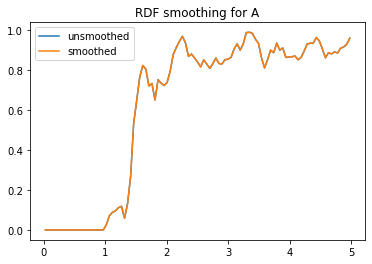

pair M-M, state A, iteration 7: 0.999699


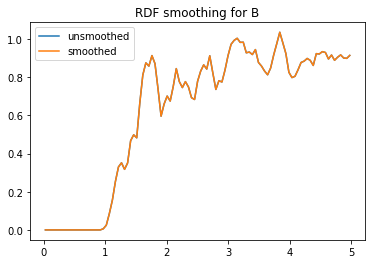

pair M-M, state B, iteration 7: 0.999782


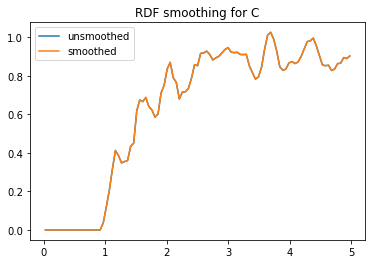

pair M-M, state C, iteration 7: 0.999705


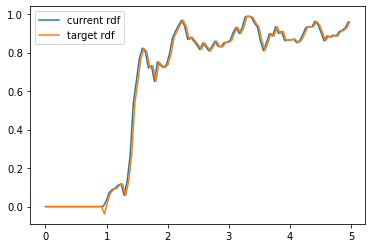

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


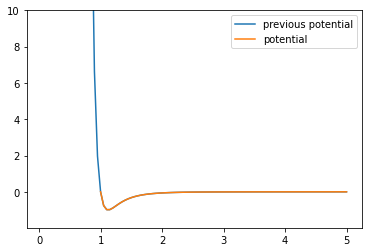

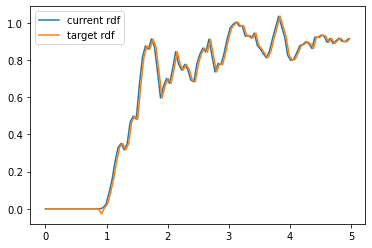

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


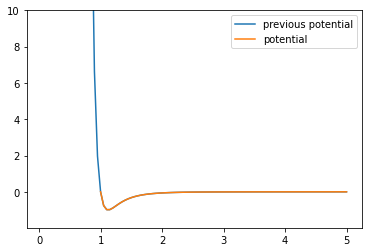

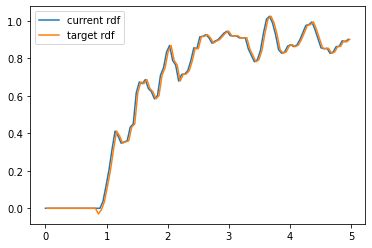

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


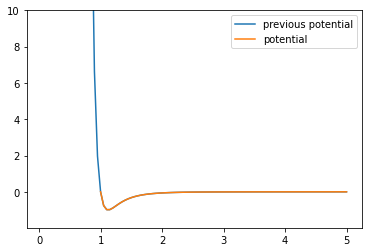

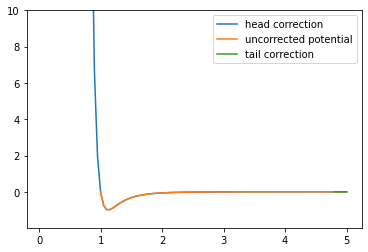

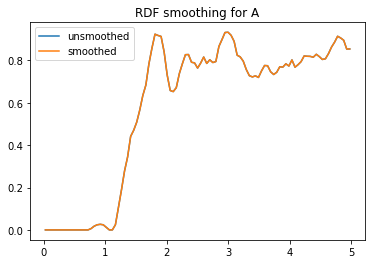

pair P-M, state A, iteration 7: 0.999691


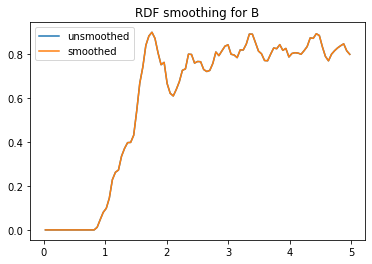

pair P-M, state B, iteration 7: 0.999847


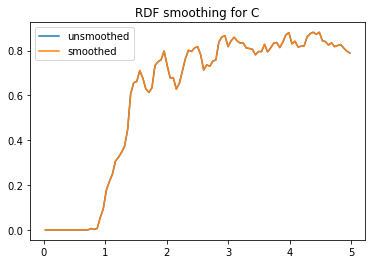

pair P-M, state C, iteration 7: 0.999921


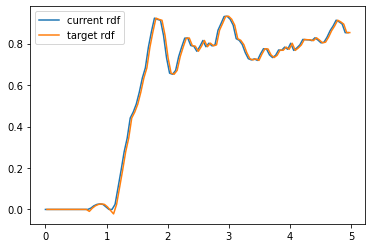

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


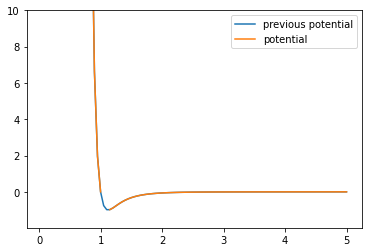

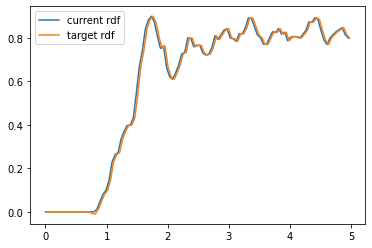

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


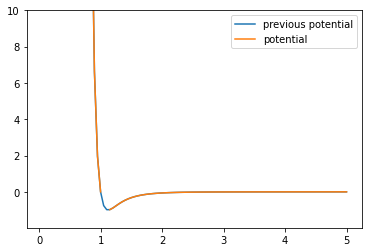

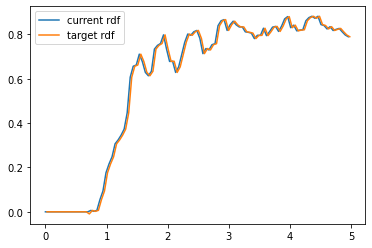

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


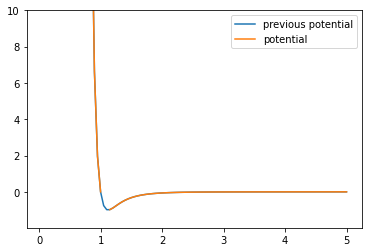

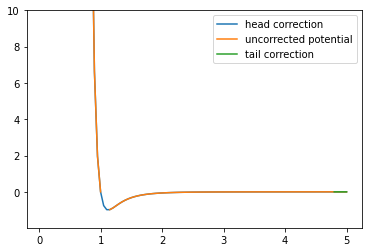

-------- Iteration 8 --------
Launching 4 CPU threads...


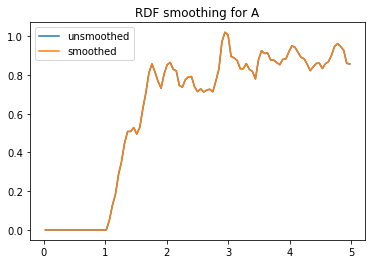

pair P-P, state A, iteration 8: 0.999856


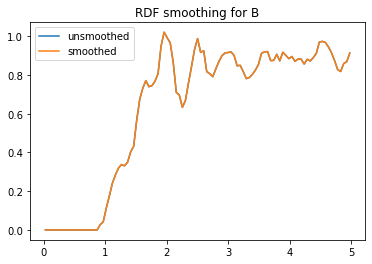

pair P-P, state B, iteration 8: 0.999838


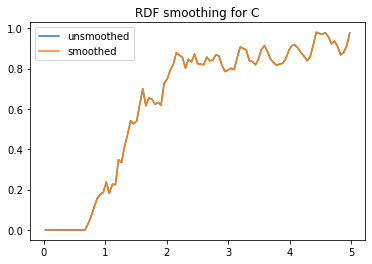

pair P-P, state C, iteration 8: 0.999645


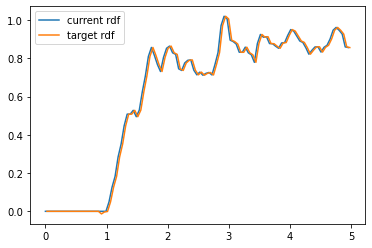

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


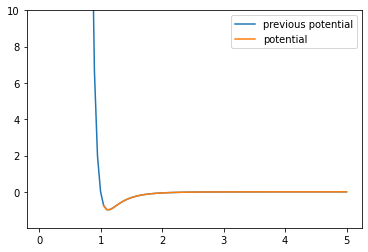

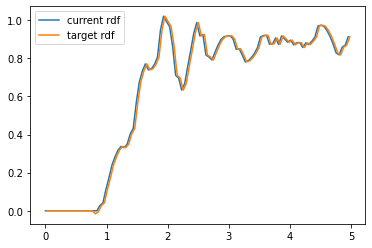

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


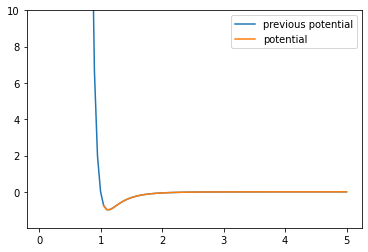

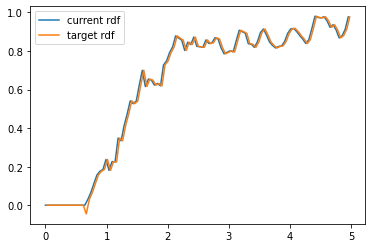

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


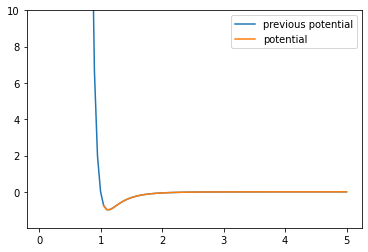

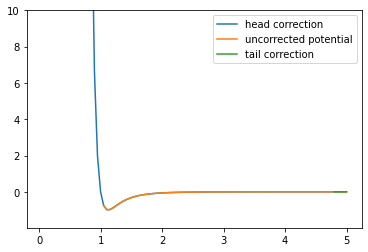

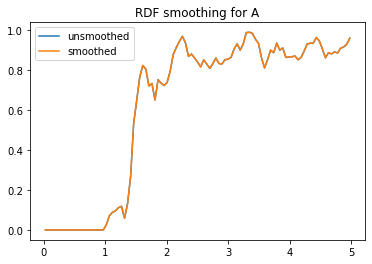

pair M-M, state A, iteration 8: 0.999699


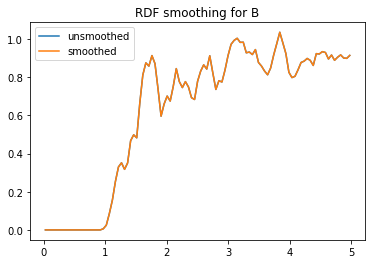

pair M-M, state B, iteration 8: 0.999782


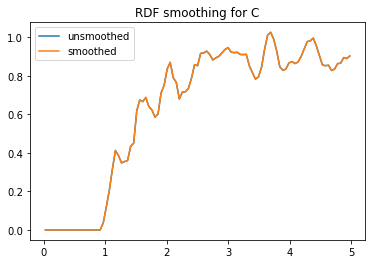

pair M-M, state C, iteration 8: 0.999705


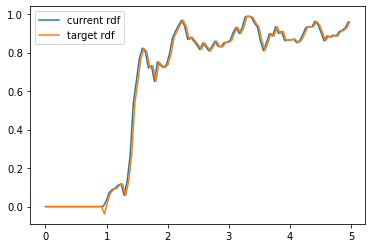

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


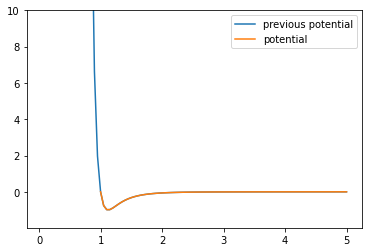

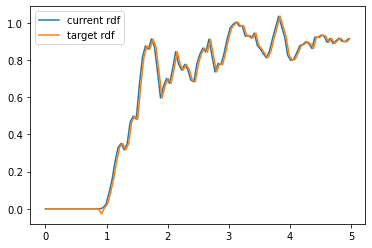

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


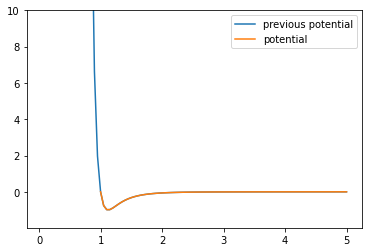

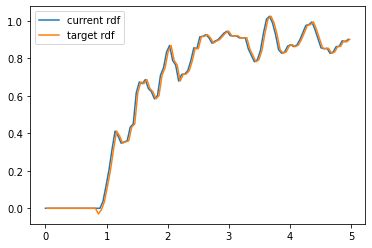

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


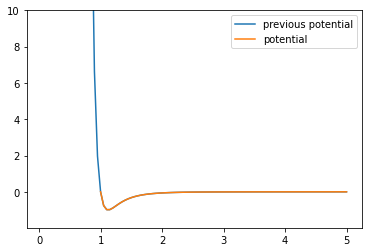

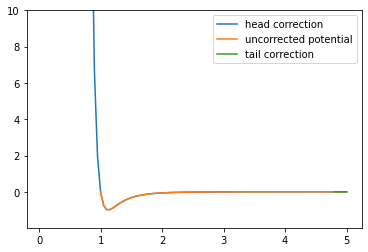

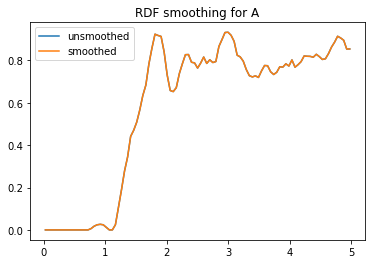

pair P-M, state A, iteration 8: 0.999691


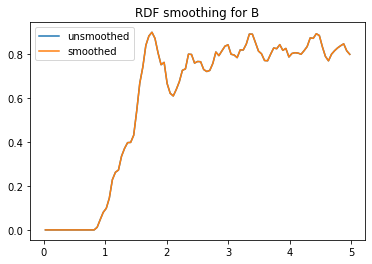

pair P-M, state B, iteration 8: 0.999847


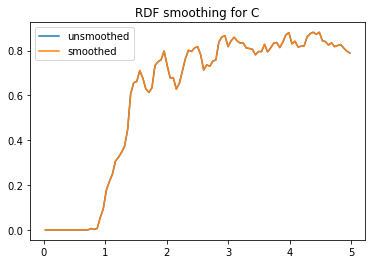

pair P-M, state C, iteration 8: 0.999921


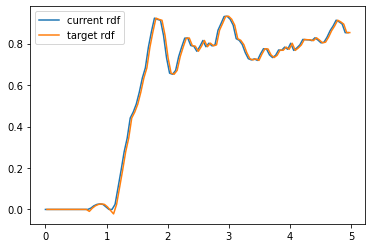

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


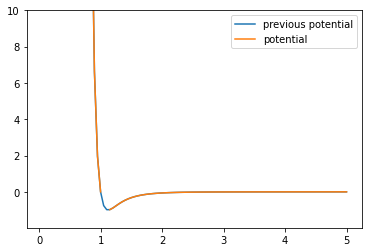

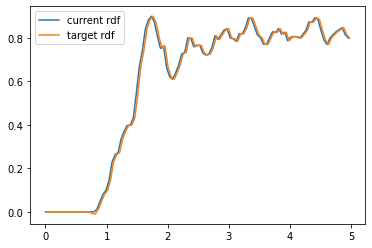

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


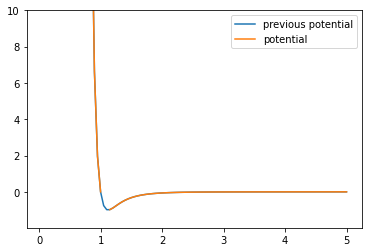

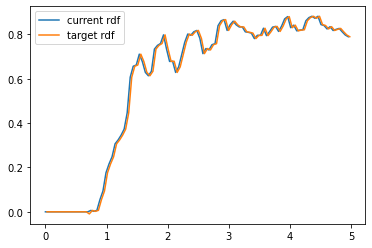

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


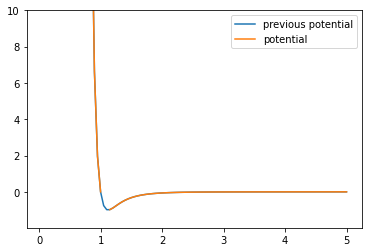

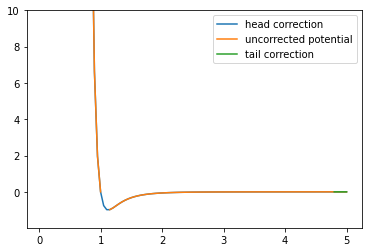

-------- Iteration 9 --------
Launching 4 CPU threads...


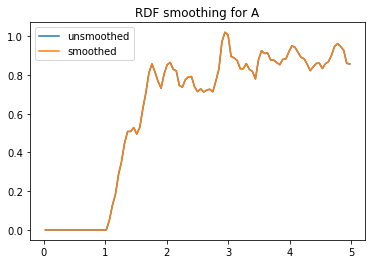

pair P-P, state A, iteration 9: 0.999856


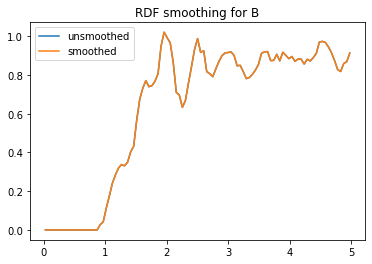

pair P-P, state B, iteration 9: 0.999838


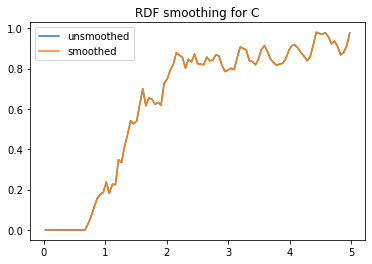

pair P-P, state C, iteration 9: 0.999645


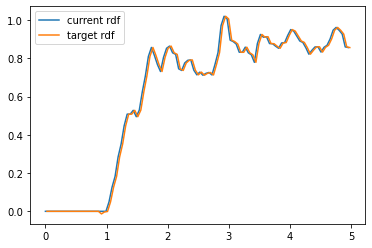

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


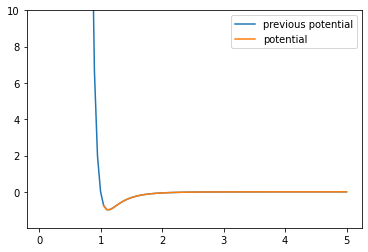

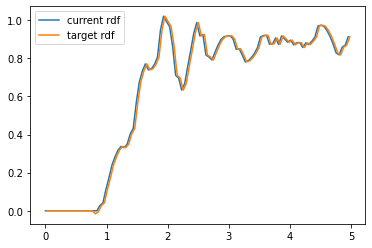

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


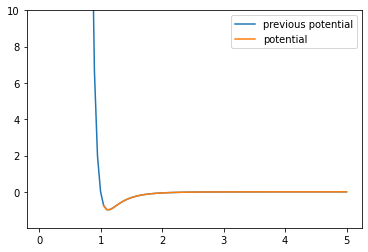

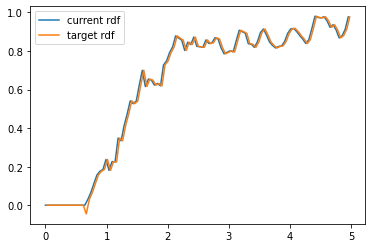

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


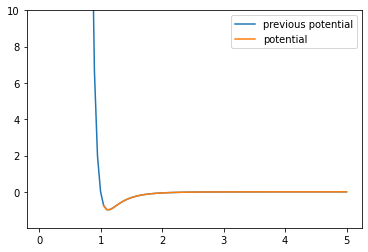

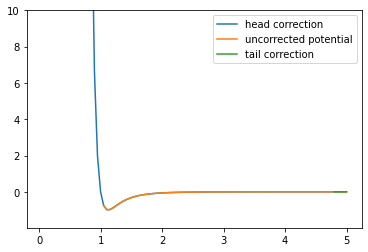

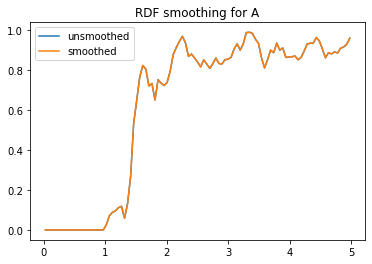

pair M-M, state A, iteration 9: 0.999699


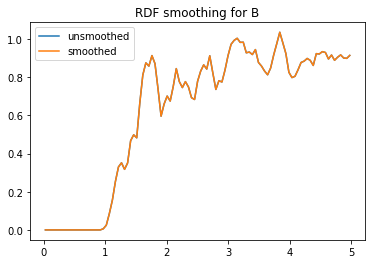

pair M-M, state B, iteration 9: 0.999782


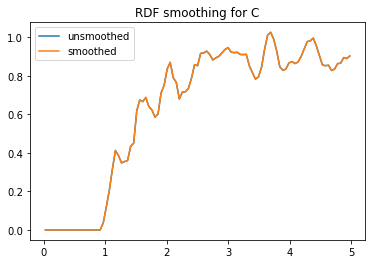

pair M-M, state C, iteration 9: 0.999705


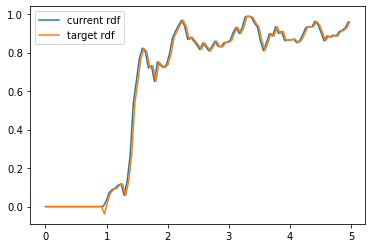

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


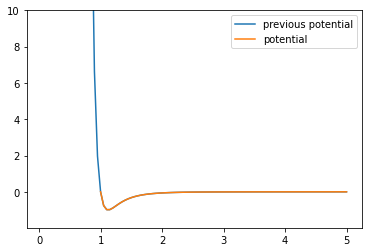

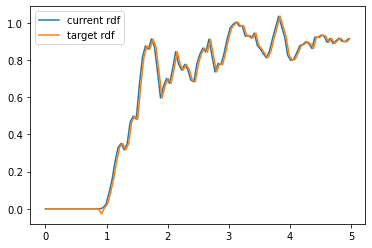

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


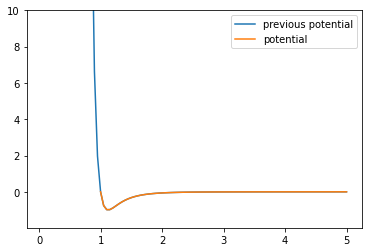

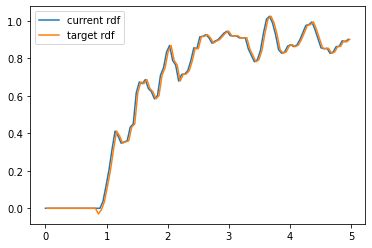

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


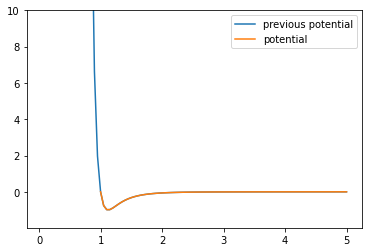

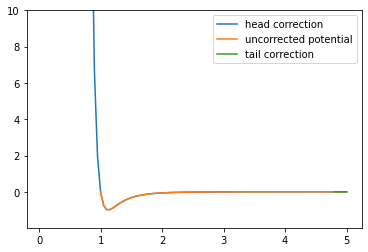

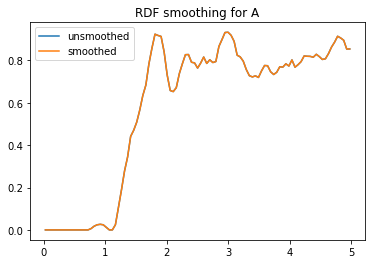

pair P-M, state A, iteration 9: 0.999691


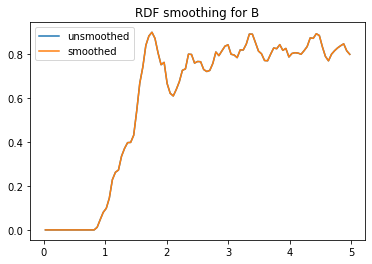

pair P-M, state B, iteration 9: 0.999847


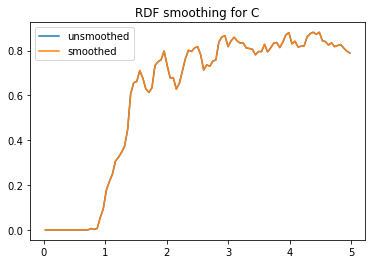

pair P-M, state C, iteration 9: 0.999921


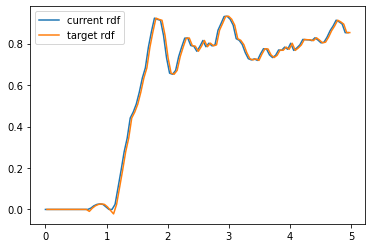

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


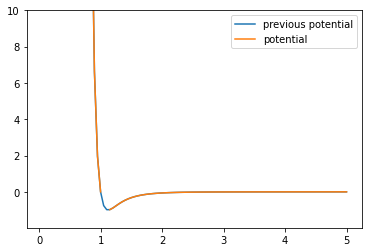

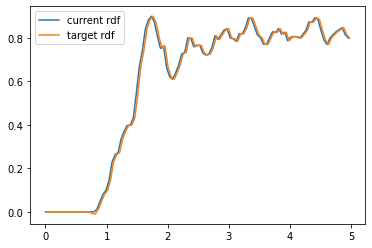

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


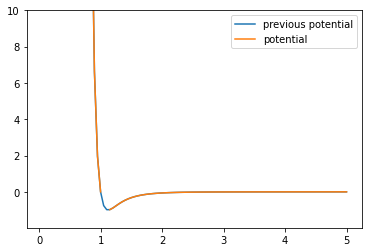

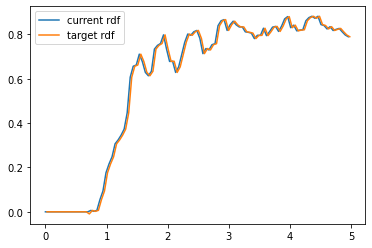

/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/Users/jenny/Projects/msibi/msibi/pair.py:169: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


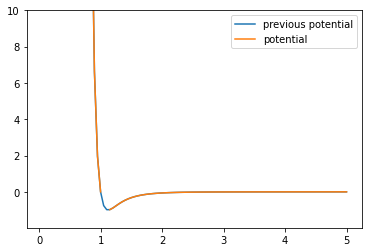

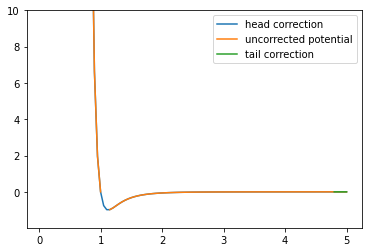

In [9]:
opt.optimize(n_iterations=10, engine='hoomd')

In [13]:
import matplotlib.pyplot as plt
import numpy as np

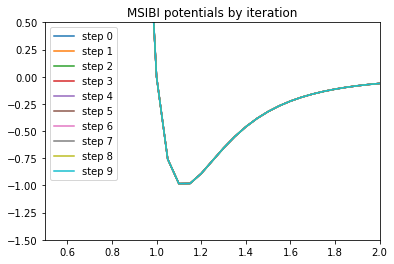

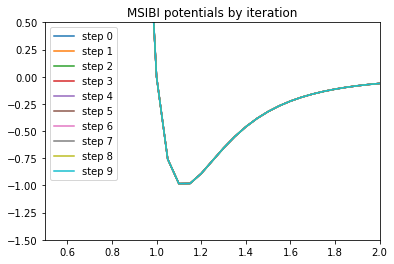

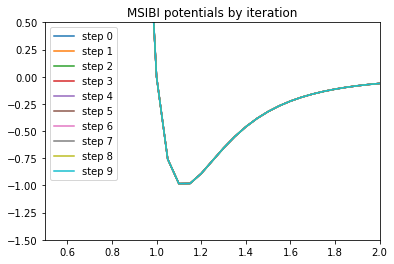

In [17]:
for step in range(0, opt.n_iterations):
    plt.ylim([-1.5,0.5])
    plt.xlim([0.5,2])
    plt.title("MSIBI potentials by iteration")

    step_pot = np.loadtxt(f'potentials/step{step}.pot.P-M.txt')
    plt.plot(step_pot[:,0],step_pot[:,1], label=f'step {step}')

plt.legend()
plt.show()

for step in range(0, opt.n_iterations):
    plt.ylim([-1.5,0.5])
    plt.xlim([0.5,2])
    plt.title("MSIBI potentials by iteration")

    step_pot = np.loadtxt(f'potentials/step{step}.pot.P-P.txt')
    plt.plot(step_pot[:,0],step_pot[:,1], label=f'step {step}')

plt.legend()
plt.show()

for step in range(0, opt.n_iterations):
    plt.ylim([-1.5,0.5])
    plt.xlim([0.5,2])
    plt.title("MSIBI potentials by iteration")

    step_pot = np.loadtxt(f'potentials/step{step}.pot.M-M.txt')
    plt.plot(step_pot[:,0],step_pot[:,1], label=f'step {step}')

plt.legend()
plt.show()